## PROJECT 1: COVID vaccination vs. mortality


> ### TASK: Stady Simple Linear Regression


### Project goals and objectives

#### Project goal

- Studying **Simple Linear Regression**

#### Project objectives

1. Explore and prepare data 
2. Build simple linear regression model


### IMPORT LIBRARIES

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns


import matplotlib.pyplot as plt
plt.style.use('seaborn')


from collections import Counter

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, mean_squared_log_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### LOAD DATA

In [2]:
# Path to data
data_path = "data/covid-vaccination-vs-death_ratio.csv"

In [3]:
# Create dataframe
data_df = pd.read_csv(data_path)

# Check result 
data_df.head().T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
country,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan
iso_code,AFG,AFG,AFG,AFG,AFG
date,2021-05-11,2021-05-20,2021-05-24,2021-05-26,2021-05-27
total_vaccinations,504502.0,547901.0,573277.0,590454.0,593313.0
people_vaccinated,448878.0,470341.0,476367.0,479372.0,479574.0
people_fully_vaccinated,55624.0,77560.0,96910.0,111082.0,113739.0
New_deaths,12,10,10,19,14
population,40194523.0,40194523.0,40194523.0,40194523.0,40194523.0
ratio,1.116764,1.170162,1.185154,1.19263,1.193133


## EXPLORATORY DATA ANALISIS

In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24179 entries, 0 to 24178
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               24179 non-null  int64  
 1   country                  24179 non-null  object 
 2   iso_code                 24179 non-null  object 
 3   date                     24179 non-null  object 
 4   total_vaccinations       24179 non-null  float64
 5   people_vaccinated        24179 non-null  float64
 6   people_fully_vaccinated  24179 non-null  float64
 7   New_deaths               24179 non-null  int64  
 8   population               24179 non-null  float64
 9   ratio                    24179 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.8+ MB


In [5]:
data_df.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
data_df.shape

(24179, 9)

### Distribution of the target variables

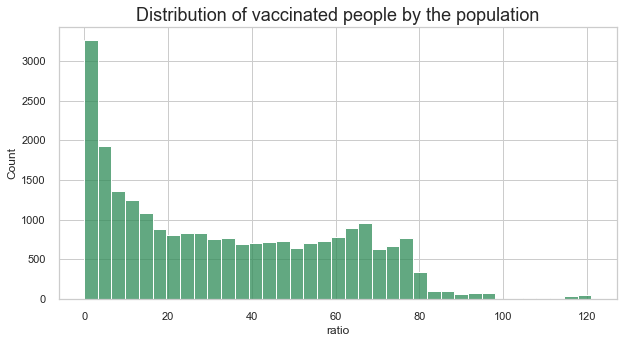

In [7]:
sns.set(rc={'figure.figsize':(10,5)})
sns.set_style('whitegrid')
sns.histplot(data=data_df, x="ratio", color="seagreen")
plt.title("Distribution of vaccinated people by the population", fontsize=18);

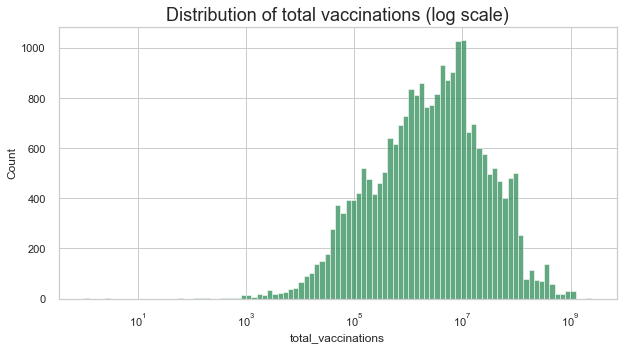

In [8]:
sns.set(rc={'figure.figsize':(10,5)})
sns.set_style('whitegrid')
sns.histplot(data=data_df, x="total_vaccinations", color="seagreen", log_scale=True)
plt.title("Distribution of total vaccinations (log scale)", fontsize=18);

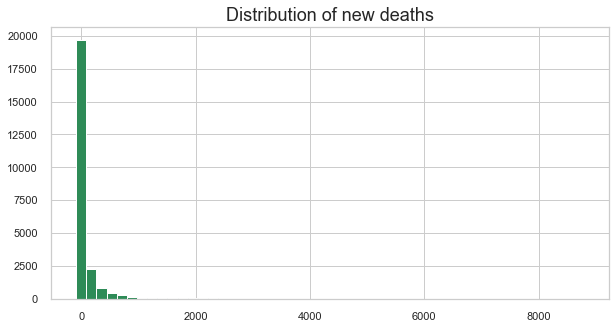

In [9]:
plt.hist(data_df.New_deaths.dropna().values, bins=50, color="seagreen")
plt.title("Distribution of new deaths", fontsize=18)
plt.show()

### Variable Types

In [10]:
# Convert date to Datetime type 
data_df['date'] = pd.to_datetime(data_df['date'])

# Check result
data_df['date'].head()

0   2021-05-11
1   2021-05-20
2   2021-05-24
3   2021-05-26
4   2021-05-27
Name: date, dtype: datetime64[ns]

In [11]:
# Identify the categorical variables
cat_vars = [var for var in data_df.columns if data_df[var].dtype == 'O']

# Number of categorical variables
print(f' Number of categorical variables: {len(cat_vars)}')

 Number of categorical variables: 2


In [12]:
# Identify the the numerical variables
num_vars = [var for var in data_df.columns if var not in cat_vars]

# Number of numerical variables
print(f' Number of numerical variables: {len(num_vars)}')

 Number of numerical variables: 7


### Missing values

In [13]:
 # List of the variables that contain missing values
vars_with_na = [var for var in data_df.columns if data_df[var].isnull().sum() > 0]

# Percentage of missing values
data_df[vars_with_na].isnull().mean().sort_values(ascending=False)

Series([], dtype: float64)

### Numerical variables

In [14]:
# Descriptive statistics
data_df[num_vars].describe().T

,count,mean,std,min,25%,50%,75%,max
total_vaccinations,24179.0,2.203965e+07,7.822728e+07,1.000000,4.859780e+05,2.849630e+06,1.246813e+07,2.422908e+09
people_vaccinated,24179.0,1.372980e+07,5.145837e+07,1.000000,3.354615e+05,1.854630e+06,7.414157e+06,1.225000e+09
people_fully_vaccinated,24179.0,8.334646e+06,2.821818e+07,1.000000,1.273365e+05,9.237190e+05,4.935768e+06,1.076308e+09
New_deaths,24179.0,1.037160e+02,3.454022e+02,-92.000000,1.000000e+00,9.000000e+00,5.150000e+01,8.786000e+03
population,24179.0,4.911567e+07,1.562990e+08,1373.000000,2.951769e+06,1.015616e+07,3.819664e+07,1.446113e+09
ratio,24179.0,3.348181e+01,2.649313e+01,0.000011,8.676753e+00,2.878617e+01,5.659115e+01,1.210369e+02


### Categorical variables

In [15]:
# Descriptive statistics
data_df[cat_vars].describe().T

,count,unique,top,freq
country,24179,200,United States of America,343
iso_code,24179,200,USA,343


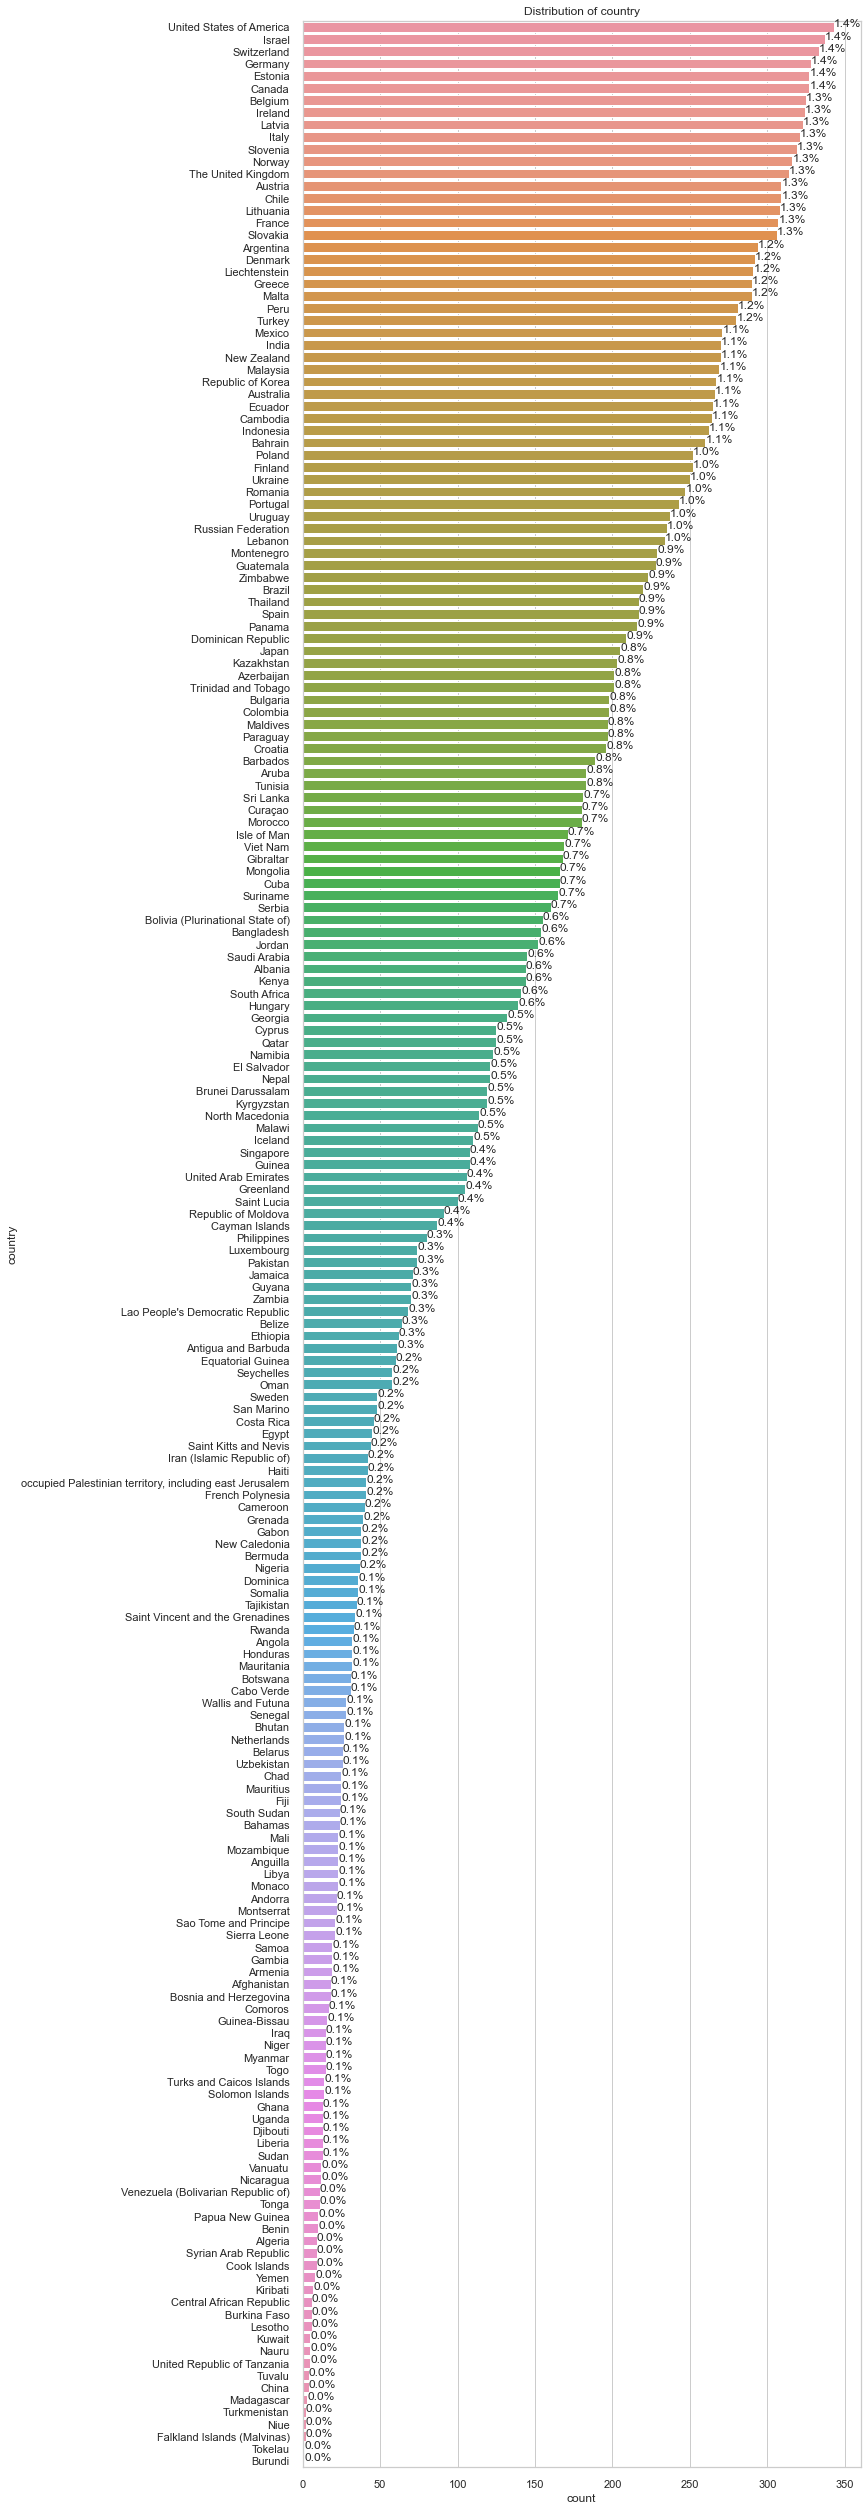

In [16]:
f, ax = plt.subplots(figsize=(10,45))
sns.countplot(y=data_df.country, order = data_df.country.value_counts().index);
ax.set_title('Distribution of country');
ax.set(ylabel='country')

total = len(data_df['country'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
        
plt.show()

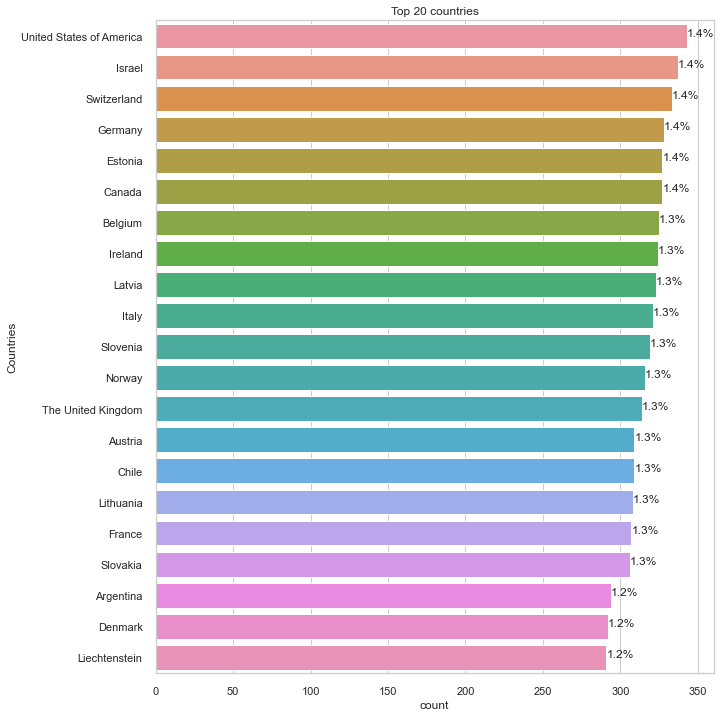

In [17]:
f, ax = plt.subplots(figsize=(10,12))
sns.countplot(y=data_df.country, order = data_df.country.value_counts().index[0:21]);
ax.set(ylabel='Countries')
ax.set_title('Top 20 countries')

total = len(data_df['country'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

### Distribution over time

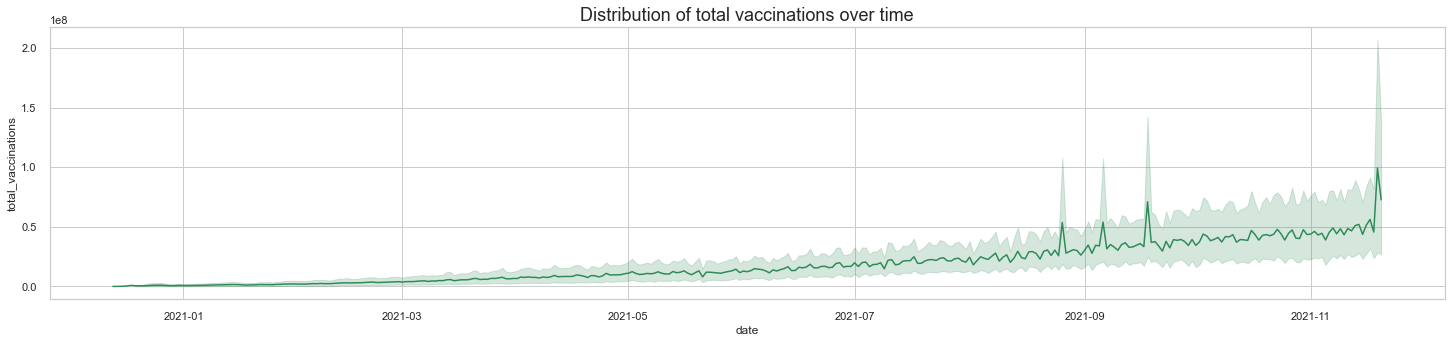

In [18]:
sns.set(rc={'figure.figsize':(25,5)})
sns.set_style('whitegrid')
sns.lineplot(data=data_df, x="date", y="total_vaccinations", color="seagreen")
plt.title("Distribution of total vaccinations over time", fontsize=18);

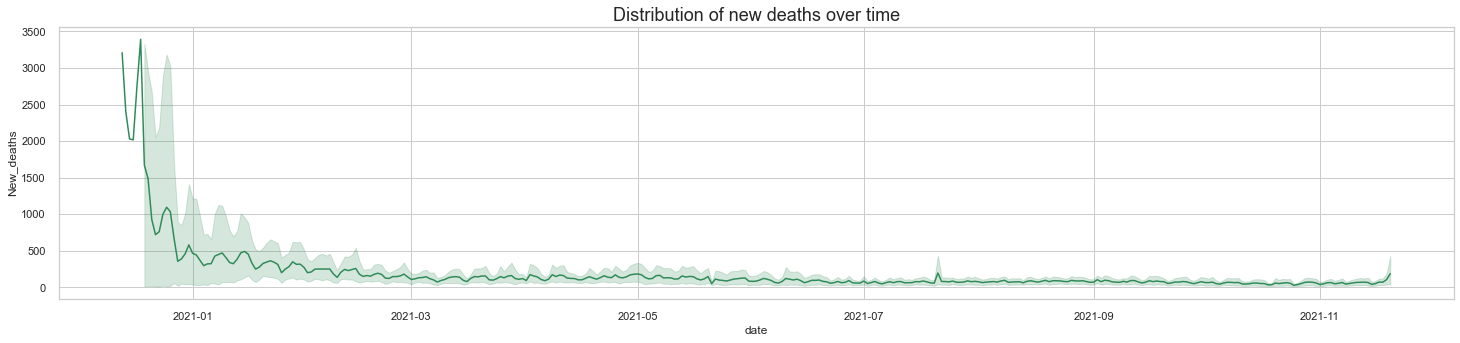

In [19]:
sns.set(rc={'figure.figsize':(25,5)})
sns.set_style('whitegrid')
sns.lineplot(data=data_df, x="date", y="New_deaths", color="seagreen")
plt.title("Distribution of new deaths over time", fontsize=18);

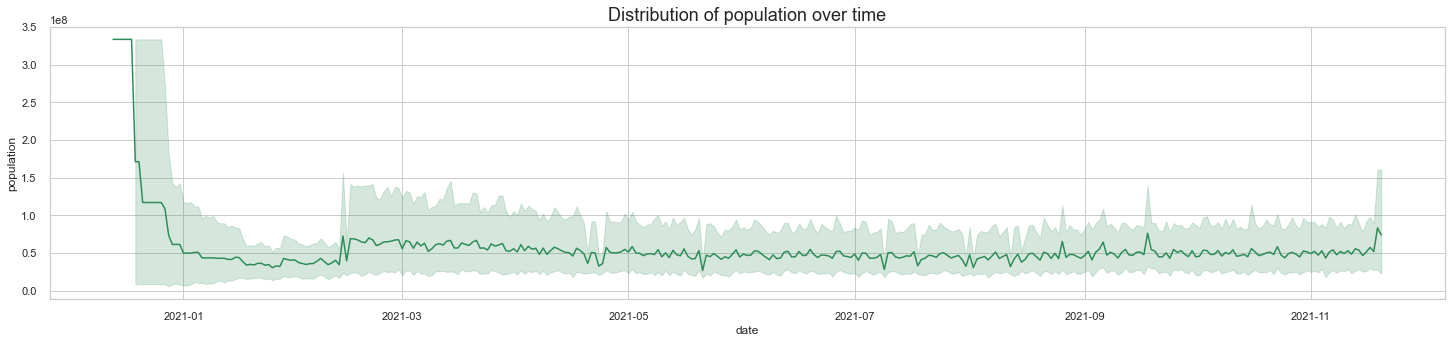

In [20]:
sns.set(rc={'figure.figsize':(25,5)})
sns.set_style('whitegrid')
sns.lineplot(data=data_df, x="date", y="population", color="seagreen")
plt.title("Distribution of population over time", fontsize=18);

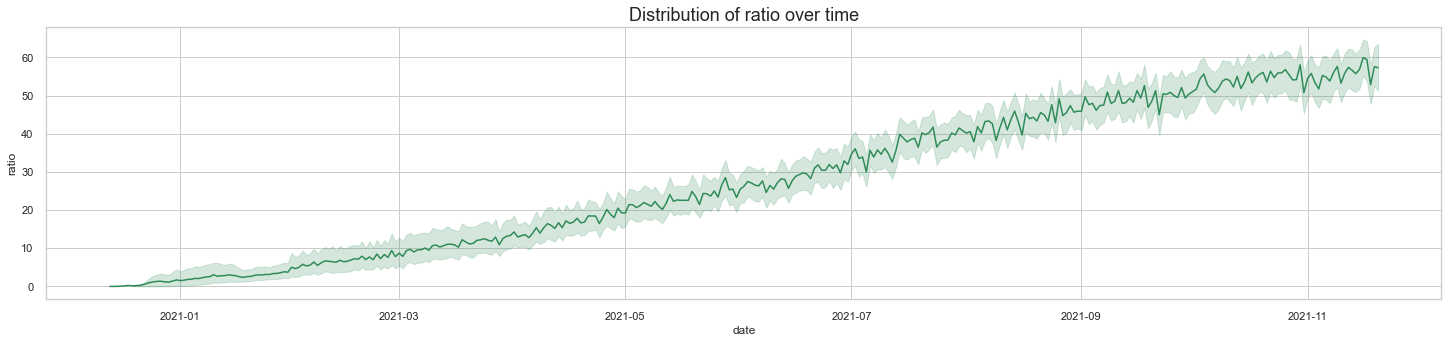

In [21]:
sns.set(rc={'figure.figsize':(25,5)})
sns.set_style('whitegrid')
sns.lineplot(data=data_df, x="date", y="ratio", color="seagreen")
plt.title("Distribution of ratio over time", fontsize=18);

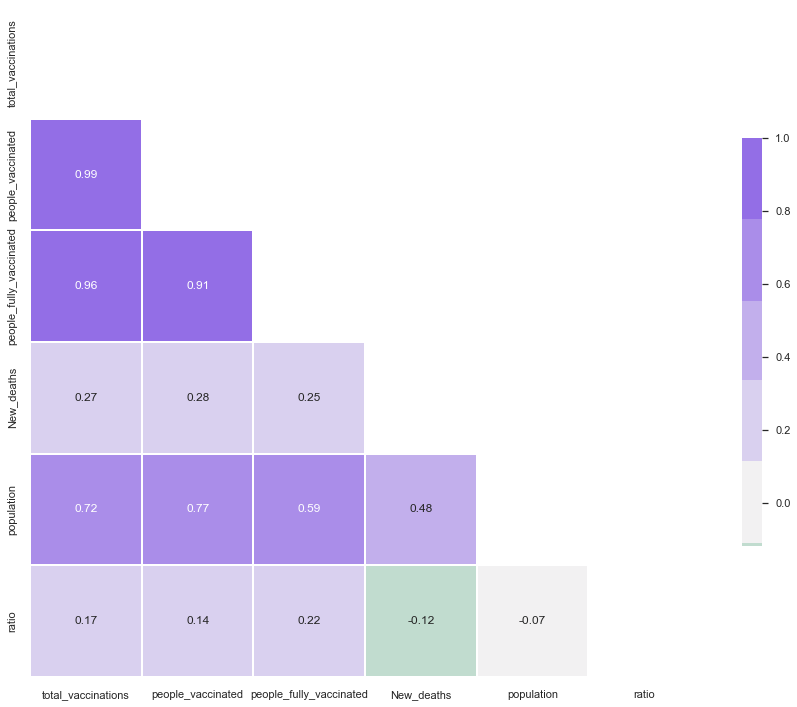

In [22]:
sns.set_theme(style="white")

# Compute the correlation matrix
corr = data_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(150, 275, s=80, l=55, n=9, )

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0, annot=True, fmt='.2f',
            square=True, linewidths=2, cbar_kws={"shrink": .5})
plt.show()

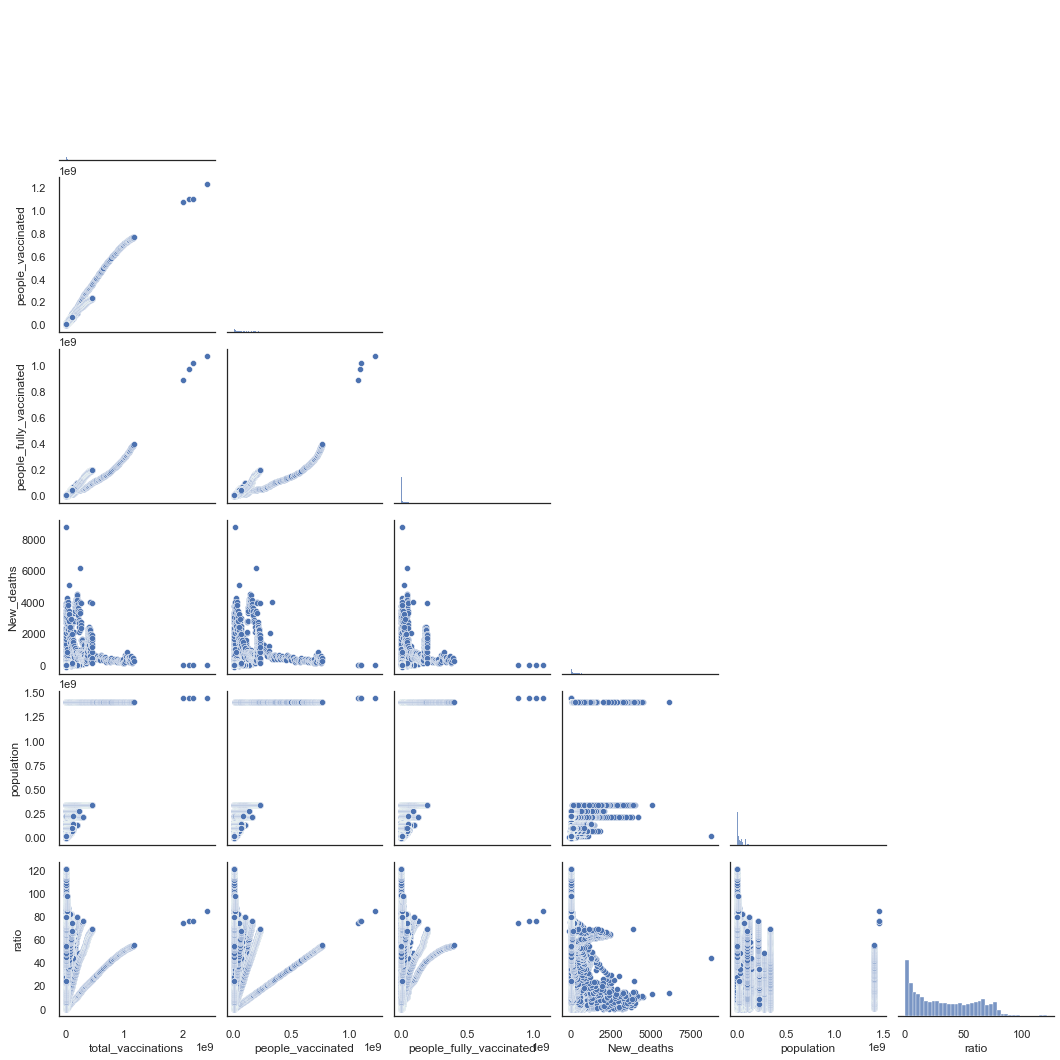

In [23]:
sns.pairplot(data = data_df, corner=True);

Text(0.5, 1.0, 'ratio vs New_deaths Russia')

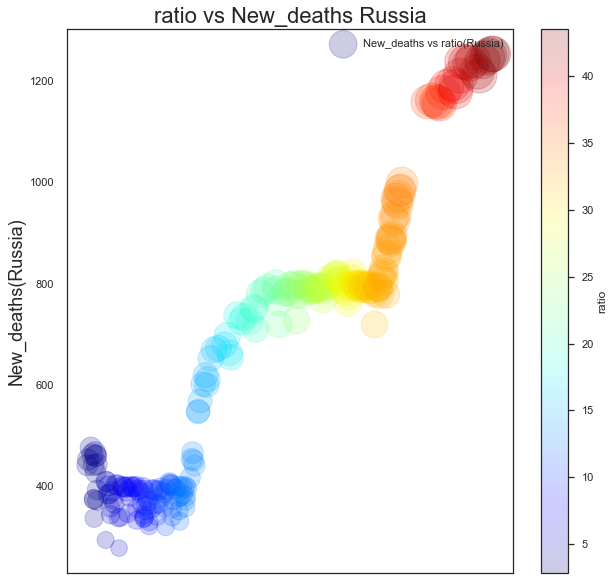

In [24]:
df_russia = data_df[data_df['country']=='Russian Federation']
df_russia.plot(
    kind='scatter',
    x='ratio',
    y='New_deaths',
    label='New_deaths vs ratio(Russia)',
    alpha=0.2,
    figsize=(10,10),
    s=df_russia['New_deaths'],
    c='ratio',
    cmap=plt.get_cmap('jet'),
    colorbar=True)

plt.xlabel('ratio(%)',fontsize=15)
plt.ylabel('New_deaths(Russia)',fontsize=18)
plt.title('ratio vs New_deaths Russia',fontsize=22)

# SIMPLE LINEAR REGRESSION

In [25]:
# Define x,y
X = df_russia[['ratio']]
y = df_russia[['New_deaths']]

In [26]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)

In [27]:
# Standard Normalization
std = StandardScaler()

X_train = std.fit_transform(X_train)
X_test = std.fit_transform(X_test)


y_train = std.fit_transform(y_train)
y_test = std.fit_transform(y_test)

In [28]:
# Instantiate model
model = LinearRegression()

# Fit the model
model.fit(X_train,y_train)

LinearRegression()

In [29]:
# Coefficients
print ('Coefficients: ', model.coef_)
print ('Intercept: ',model.intercept_)

Coefficients:  [[0.94660568]]
Intercept:  [5.4169703e-17]


In [30]:
# Prediction
y_pred = std.inverse_transform(model.predict(X_test))

Text(0.5, 1.0, 'Liner Regression')

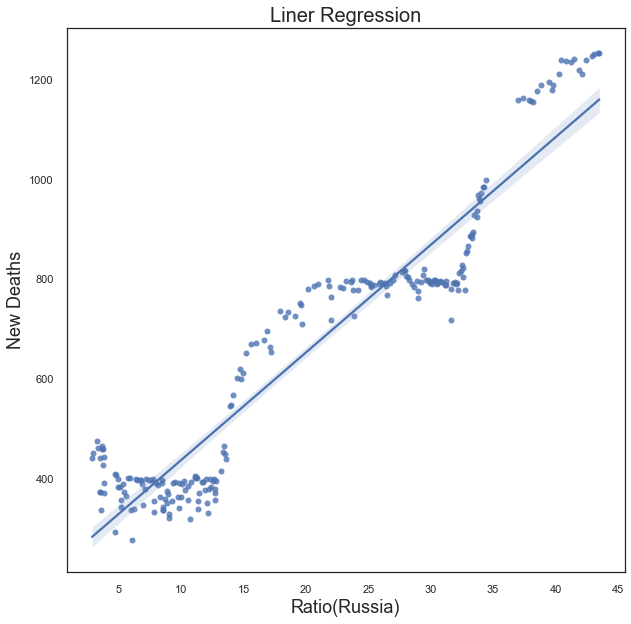

In [33]:
# Plot result

X = df_russia['ratio']
y = df_russia['New_deaths']

plt.figure(figsize=(10,10))
sns.regplot(x=X, y=y)

plt.xlabel('Ratio(Russia)',fontsize=18)
plt.ylabel('New Deaths',fontsize=18)
plt.title('Liner Regression',fontsize=20)

#  EVALUATION

In [45]:
# Create function to evaluate our model
def show_scores(model):
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Test MAE": mean_absolute_error(y_test, test_preds),
              "Training R^2": model.score(X_train, y_train),
              "Test R^2": model.score(X_test, y_test)}
    return scores

In [49]:
show_scores(model)

{'Training MAE': 0.2774999500653797,
 'Test MAE': 0.23621204151923852,
 'Training R^2': 0.8960623041361251,
 'Test R^2': 0.9253584593908261}